Draft of a crypto punk model
* Add your infura key to env under KEY
* web3.py only works w python 3.7 for some reason
* one hot encoding of attributes(eg: hair color etc) and punk types (ape, alien, etc)
* gets the "punkBought" from the punks contract for price data


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import glob
import os
from web3 import Web3
import seaborn as sns

In [2]:
# get attribute data
data_filenames = glob.glob("./data/*.csv")

df = pd.DataFrame()
for f in data_filenames:
    df = df.append(pd.read_csv(f))

df = df.set_index('id')
df.columns = ['type', 'attr_count', 'attrs']


def clean(attr_str):
    if (attr_str == ' '): 
        return ['None']
    else:
        attrs = attr_str.split(" / ")
        return list(map(lambda x: x.replace(" ",""), attrs))

df['attrs'] = df['attrs'].apply(clean)#https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies/29036042
attr_dummies = pd.get_dummies(df['attrs'].apply(pd.Series).stack()).sum(level=0)
type_dummies = pd.get_dummies(df['type'])
type_dummies = type_dummies.rename(str.strip, axis='columns')

r = df.join(attr_dummies)
del r['attr_count']
del r['type']
del r['attrs']

del df['attrs']
del df['type']

df = df.join(type_dummies).join(attr_dummies)

In [3]:
freq = r.apply(pd.Series.value_counts)
freq = freq.drop([0])#drop row of emtpies
freq = freq.squeeze().sort_values()

In [4]:
TOTAL_PUNKS = 10000
freq = freq.apply(lambda x: x/TOTAL_PUNKS)

In [5]:
def _print(content):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(content)

In [6]:
# input index => 
s = df 
s = s.drop(['attr_count', 'Alien','Ape','Female','Male','Zombie'], axis=1)

In [7]:
def get_rareness(idx):
    rarenesss = {}
    punk_attrs = r.loc[idx].where(lambda x: x == 1).dropna()
    for x in punk_attrs.index.values:
        rarenesss[x] = freq.loc[x]
    return rarenesss

def get_rareness_ranks(input_arr):
    arr = list(map(lambda x: (x, get_rareness(x)), input_arr))
    arr.sort(key=lambda x: min(list(x[1].values())))
    return arr

def get_attr_ranks(input_arr):
    arr = list(map(lambda x: (x, get_rareness(x)), input_arr))
    arr.sort(key=lambda x: len(x[1]), reverse=True)
    return arr

In [10]:
basic_punk =  [7264, 5087, 8945, 3834, 5886, 8730, 4493, 4902, 7080, 138, 4174, 3776, 5544, 9364, 4391, 3143, 2212, 3346, 3736, 5428, 7681, 9174, 7575, 4091, 4866, 639, 239, 8150, 8444, 8078, 6457, 3530, 926, 2724, 3744, 4252, 9243, 3533, 7741, 8339, 2635, 3846, 3759, 7238, 8885, 2584, 7254, 2599, 7160, 9656, 2309, 5536, 4201, 4960, 3150, 8381, 3235, 6514, 4933, 8208, 7556, 4348, 9564, 5374, 8476, 3920, 4006, 5020, 3357, 8586, 1417, 2348, 2287, 1966, 2652, 441, 7672, 4587, 6276, 6584, 9900, 299, 5999, 9535, 7130, 9384, 8396, 7702, 1011, 7893, 8641, 8144, 6755, 3081, 9075, 2511, 4951, 2036, 6901, 4064]
basic_punk2 = [3776, 1704, 2076, 2907, 7254, 9384, 2870, 7130, 702, 3744, 2724, 7681, 1585, 3553, 6354, 7345, 239, 6588, 4933, 4960, 8078, 9243, 3533, 4252, 9900, 5087, 6514, 2088, 709, 1781, 2577, 2661, 6523, 8444, 2825, 7264, 8177, 1791, 743, 8945, 7672, 3497, 8381, 9152, 4175, 8067, 3346, 4951, 5020, 5237, 5366, 9174, 299, 2584, 639, 7741, 4064, 3235, 426, 8706, 8946, 926, 5544, 981, 5536, 5428, 4902, 9656, 3192, 2599, 8144, 3676, 3759, 8396, 7238, 9364, 4587, 4391, 7160, 3143, 3081, 3114, 9902, 4866, 3782, 7893, 6457, 8208, 2309, 8730, 506, 9744, 4201, 5416, 7575, 8091, 5374, 8339, 6755, 5999, 9535, 4493, 1440, 8892, 5077, 4905, 6397, 8389, 6654, 6901, 2790, 6953, 7008, 7080, 2939, 3357, 8476, 3306, 6580, 7668, 9075, 2986, 7702, 820, 2036, 6276, 3150, 2511, 6878, 3421, 4006, 5612]
attr_4 = [8830, 9305, 4162, 8671, 3379, 9157, 8172, 2398, 4068, 2728, 7627, 7822, 7505, 4875, 9142, 7032, 9564, 9090, 8302, 9717, 9519, 9887, 3067, 9442]
attr_5 = [6295, 2209, 4716, 8101, 3361, 5647, 5101, 3438, 4669]
zombie = [6649, 2329, 2424]
punk_female = [9228, 9924, 7392, 3179, 4950, 5462, 9647, 4912, 5279, 2905, 5354, 6379, 5672, 1628, 4546, 5535, 6028, 5881, 1350, 2170, 4046, 3082, 8029, 3610, 5467, 6257, 8662, 1392, 2023]

In [11]:
get_rareness_ranks(punk_female)

[(4912, {'BlackLipstick': 0.0617, 'DarkHair': 0.0157, 'Mole': 0.0644}),
 (4950, {'Bandana': 0.0481, 'BlueEyeShadow': 0.0266, 'Mole': 0.0644}),
 (5279, {'Bandana': 0.0481, 'BlueEyeShadow': 0.0266}),
 (5535,
  {'BlueEyeShadow': 0.0266, 'HotLipstick': 0.0696, 'StringyHair': 0.0463}),
 (3179, {'GreenEyeShadow': 0.0271, 'Mohawk': 0.0441}),
 (6028, {'Earring': 0.2459, 'GreenEyeShadow': 0.0271, 'StringyHair': 0.0463}),
 (2023, {'GreenEyeShadow': 0.0271, 'MessyHair': 0.046, 'Mole': 0.0644}),
 (3082,
  {'BlackLipstick': 0.0617, 'ClownEyesGreen': 0.0382, 'MohawkDark': 0.0429}),
 (2905, {'Earring': 0.2459, 'HotLipstick': 0.0696, 'KnittedCap': 0.0419}),
 (9924, {'HotLipstick': 0.0696, 'MohawkDark': 0.0429, 'Mole': 0.0644}),
 (5881, {'HotLipstick': 0.0696, 'MohawkDark': 0.0429, 'Mole': 0.0644}),
 (9228,
  {'BlackLipstick': 0.0617, 'HornedRimGlasses': 0.0535, 'Mohawk': 0.0441}),
 (6379, {'BlackLipstick': 0.0617, 'Earring': 0.2459, 'MohawkThin': 0.0441}),
 (5672, {'Mohawk': 0.0441, 'Mole': 0.0644, 'P

In [402]:
arr = list(map(lambda x: (x, get_rareness(x)), basic_punk))
arr[0]

(3776, {'FrontBeardDark': 260, 'FrumpyHair': 442})

In [258]:
freq.mean()

313.03409090909093

In [260]:
freq.loc['Cigarette']

961

In [3]:
def hexDaysAgo(w3, days):
    blocks_per_day = round(86400 / 14)
    target = w3.eth.block_number - days * blocks_per_day
    return hex(target)

In [4]:
INFURA_KEY = os.environ.get('KEY')
# print(INFURA_KEY)

In [198]:
# get events

QUERY_DAYS = 15
w3 = Web3(Web3.HTTPProvider('https://mainnet.infura.io/v3/a92bf60569df4e02b242dbd8357fffac'))
abi_text = """[{"constant":true,"inputs":[],"name":"name","outputs":[{"name":"","type":"string"}],"payable":false,"type":"function"},{"constant":true,"inputs":[{"name":"","type":"uint256"}],"name":"punksOfferedForSale","outputs":[{"name":"isForSale","type":"bool"},{"name":"punkIndex","type":"uint256"},{"name":"seller","type":"address"},{"name":"minValue","type":"uint256"},{"name":"onlySellTo","type":"address"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"}],"name":"enterBidForPunk","outputs":[],"payable":true,"type":"function"},{"constant":true,"inputs":[],"name":"totalSupply","outputs":[{"name":"","type":"uint256"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"},{"name":"minPrice","type":"uint256"}],"name":"acceptBidForPunk","outputs":[],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"decimals","outputs":[{"name":"","type":"uint8"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"addresses","type":"address[]"},{"name":"indices","type":"uint256[]"}],"name":"setInitialOwners","outputs":[],"payable":false,"type":"function"},{"constant":false,"inputs":[],"name":"withdraw","outputs":[],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"imageHash","outputs":[{"name":"","type":"string"}],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"nextPunkIndexToAssign","outputs":[{"name":"","type":"uint256"}],"payable":false,"type":"function"},{"constant":true,"inputs":[{"name":"","type":"uint256"}],"name":"punkIndexToAddress","outputs":[{"name":"","type":"address"}],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"standard","outputs":[{"name":"","type":"string"}],"payable":false,"type":"function"},{"constant":true,"inputs":[{"name":"","type":"uint256"}],"name":"punkBids","outputs":[{"name":"hasBid","type":"bool"},{"name":"punkIndex","type":"uint256"},{"name":"bidder","type":"address"},{"name":"value","type":"uint256"}],"payable":false,"type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"balanceOf","outputs":[{"name":"","type":"uint256"}],"payable":false,"type":"function"},{"constant":false,"inputs":[],"name":"allInitialOwnersAssigned","outputs":[],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"allPunksAssigned","outputs":[{"name":"","type":"bool"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"}],"name":"buyPunk","outputs":[],"payable":true,"type":"function"},{"constant":false,"inputs":[{"name":"to","type":"address"},{"name":"punkIndex","type":"uint256"}],"name":"transferPunk","outputs":[],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"symbol","outputs":[{"name":"","type":"string"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"}],"name":"withdrawBidForPunk","outputs":[],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"to","type":"address"},{"name":"punkIndex","type":"uint256"}],"name":"setInitialOwner","outputs":[],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"},{"name":"minSalePriceInWei","type":"uint256"},{"name":"toAddress","type":"address"}],"name":"offerPunkForSaleToAddress","outputs":[],"payable":false,"type":"function"},{"constant":true,"inputs":[],"name":"punksRemainingToAssign","outputs":[{"name":"","type":"uint256"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"},{"name":"minSalePriceInWei","type":"uint256"}],"name":"offerPunkForSale","outputs":[],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"}],"name":"getPunk","outputs":[],"payable":false,"type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"pendingWithdrawals","outputs":[{"name":"","type":"uint256"}],"payable":false,"type":"function"},{"constant":false,"inputs":[{"name":"punkIndex","type":"uint256"}],"name":"punkNoLongerForSale","outputs":[],"payable":false,"type":"function"},{"inputs":[],"payable":true,"type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"name":"to","type":"address"},{"indexed":false,"name":"punkIndex","type":"uint256"}],"name":"Assign","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"from","type":"address"},{"indexed":true,"name":"to","type":"address"},{"indexed":false,"name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"from","type":"address"},{"indexed":true,"name":"to","type":"address"},{"indexed":false,"name":"punkIndex","type":"uint256"}],"name":"PunkTransfer","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"punkIndex","type":"uint256"},{"indexed":false,"name":"minValue","type":"uint256"},{"indexed":true,"name":"toAddress","type":"address"}],"name":"PunkOffered","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"punkIndex","type":"uint256"},{"indexed":false,"name":"value","type":"uint256"},{"indexed":true,"name":"fromAddress","type":"address"}],"name":"PunkBidEntered","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"punkIndex","type":"uint256"},{"indexed":false,"name":"value","type":"uint256"},{"indexed":true,"name":"fromAddress","type":"address"}],"name":"PunkBidWithdrawn","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"punkIndex","type":"uint256"},{"indexed":false,"name":"value","type":"uint256"},{"indexed":true,"name":"fromAddress","type":"address"},{"indexed":true,"name":"toAddress","type":"address"}],"name":"PunkBought","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"punkIndex","type":"uint256"}],"name":"PunkNoLongerForSale","type":"event"}]"""
punk_contract = w3.eth.contract(address="0xb47e3cd837dDF8e4c57F05d70Ab865de6e193BBB", abi = abi_text)
event_filter = punk_contract.events.PunkBought.createFilter(fromBlock = hexDaysAgo(w3, QUERY_DAYS))
punk_events = event_filter.get_all_entries()


print(len(punk_events))

unset_events = list(filter(lambda x: x.args.value == 0, punk_events))
punk_events = list(filter(lambda x: x.args.value != 0, punk_events))

826


In [193]:

# for e in unset_events: 
#     callData = w3.eth.get_transaction(e.transactionHash).input
#     punk_contract.decode_function_input

In [210]:
scratch = unset_events
# scratch_dict = scratch[0].args
# scratch_dict.value = 0
scratch[1].args.update({value:4})

AttributeError: 'AttributeDict' object has no attribute 'update'

In [214]:
dir(scratch[1].args.__dict__.update(b))

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

In [215]:
punk_events[0]

AttributeDict({'args': AttributeDict({'punkIndex': 1094,
  'fromAddress': '0x82B1F29C5608238DF2618F996827933c0d844079',
  'toAddress': '0xaE4D837cAA0C53579f8a156633355Df5058B02f3',
  'value': 51000000000000000000}),
 'event': 'PunkBought',
 'logIndex': 106,
 'transactionIndex': 172,
 'transactionHash': HexBytes('0x0a5bf43c93ef7615a0450145cc1e647089eb76e006f3f612f716fe80c1058ad5'),
 'address': '0xb47e3cd837dDF8e4c57F05d70Ab865de6e193BBB',
 'blockHash': HexBytes('0x01c0554c79999f54f8c553a6ba62bfb61e66a1a3df9692e9f7c05ca0deda16c7'),
 'blockNumber': 11987581})

In [170]:
a = w3.eth.get_transaction('0x07813d642ab9519df246716fbf7702d62c0bbcead89e1285a40b71846418c401').input
punk_contract.decode_function_input(a)[1]['minPrice']

23000000000000000000

In [161]:
Web3.toInt(hexstr=e[0].data) / 1e18

17.99

In [71]:
ids = []
values = []
for e in punk_events:
    if (e.args.value != 0): #not sure why
        ids.append(e.args.punkIndex)
        values.append(e.args.value / 1e18) # PROBABLY UNSAFE
    
df_sell = pd.DataFrame(values, index=ids)
df_sell.columns = ['price']
df_sell.index.name = 'id'

b = pd.merge(df, df_sell, how='inner', on='id')

In [50]:
# b = b.drop(columns=['Male', 'Female'])
b.drop(b[b['Alien'] == 1].index, inplace = True)
b.drop(b[b['Ape'] == 1].index, inplace = True)
b.drop(b[b['Zombie'] == 1].index, inplace = True)

In [56]:
len(b)

515

In [53]:
perc_train = .7
split_num = round(len(b) * perc_train)

x = b.loc[:, b.columns != 'price'].to_numpy()
y = b['price'].to_numpy()
 
x_train = x[0:split_num]
x_test = x[split_num:]

y_train = y[0:split_num]
y_test = y[split_num:]


In [54]:
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression(positive=True)
model = model.fit(x_train, y_train)

y_pred = model.predict(x_test)

with np.nditer(y_pred, op_flags=['readwrite']) as it:
    for x in it:
       x[...] = 20 if x < 20 else x

print('Coefficients: \n', model.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Coefficients: 
 [16.02978027  0.          0.          3.348511    0.          0.        ]
Mean squared error: 226.94
Coefficient of determination: -0.22


In [55]:
b

,attr_count,Alien,Ape,Female,Male,Zombie,price
id,,,,,,,
7005,2,0,0,0,1,0,21.00
7025,2,0,0,0,1,0,21.00
7053,2,0,0,0,1,0,23.99
7053,2,0,0,0,1,0,26.00
7072,2,0,0,0,1,0,24.00
...,...,...,...,...,...,...,...
8924,3,0,0,1,0,0,20.49
8933,2,0,0,1,0,0,23.49
8944,3,0,0,1,0,0,23.80


In [58]:
tips = sns.load_dataset("tips")

<AxesSubplot:xlabel='price', ylabel='Count'>

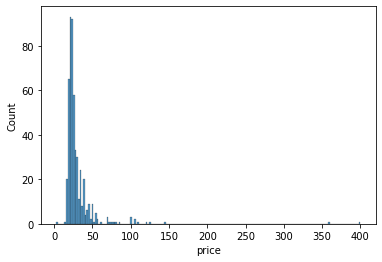

In [62]:
sns.histplot(data=b, x="price")

<AxesSubplot:ylabel='price'>

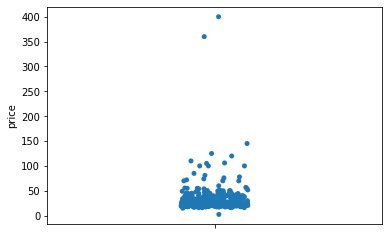

In [122]:
sns.stripplot(data=b[(b.Male == 1) | (b.Female == 1)], y="price")

<AxesSubplot:xlabel='type', ylabel='price'>

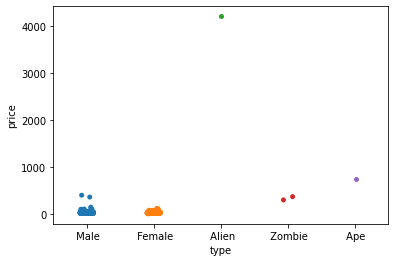

In [85]:
sns.stripplot(data=b, x="type", y="price")

<AxesSubplot:>

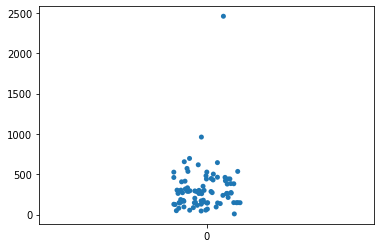

In [431]:
sns.stripplot(data=freq)

In [100]:
df[(df.Male == 1) | (df.Female == 1)]

,type,attr_count,Alien,Ape,Female,Male,Zombie
id,,,,,,,
7000,Male,2,0,0,0,1,0
7001,Male,4,0,0,0,1,0
7002,Male,3,0,0,0,1,0
7003,Male,3,0,0,0,1,0
7004,Male,2,0,0,0,1,0
...,...,...,...,...,...,...,...
8995,Male,3,0,0,0,1,0
8996,Male,3,0,0,0,1,0
8997,Female,3,0,0,1,0,0


In [430]:
freq.median()

271.5